In [72]:
start="2013-01-30"
end="2023-12-31"
from vnquant import plot as pl
pl.vnquant_candle_stick(
    data='VND',
    title=f'VND symbol from {start} to {end}',
    xlab='Date', ylab='Price',
    start_date= start,
    end_date=end,
    data_source='VND',
    show_advanced=['volume', 'macd', 'rsi']
)

2023-10-22 10:41:54,739 : INFO : data VND from 2013-01-30 to 2023-12-31 have already cloned!


In [73]:
import vnquant.data as dt
def selected_stock(stock,selected_stock_start,selected_stock_end):
    loader = dt.DataLoader(symbols=[stock], start = selected_stock_start, end=selected_stock_end, minimal=True, data_source="VND")
    data_selected = loader.download()
    return data_selected,selected_stock_start,selected_stock_end

data_selected,stock_start,stock_end = selected_stock("VCB","2020-01-01","2023-01-01")
data_selected.head()

2023-10-22 10:41:55,740 : INFO : data VCB from 2020-01-01 to 2023-01-01 have already cloned!


Attributes,high,low,open,close,avg,volume
Symbols,VCB,VCB,VCB,VCB,VCB,VCB
date,,,,,,
2020-01-02,91.4,89.7,90.2,90.8,90.68,386290.0
2020-01-03,91.8,89.9,91.5,89.9,90.81,536130.0
2020-01-06,89.5,87.5,89.2,87.5,88.54,880110.0
2020-01-07,87.9,85.4,87.0,87.8,86.54,1013270.0
2020-01-08,87.9,86.2,86.9,87.0,86.97,722280.0


In [74]:
from vnquant import plot as pl
pl.vnquant_candle_stick(
    data = data_selected,
    title='Your data',
    ylab='Date', xlab='Price',
    show_advanced=['volume', 'macd', 'rsi']
)

In [213]:
import vnquant.data as dt
from vnquant import plot as pl
from vnquant import utils
class SelectedStock:
    def __init__(self, stock, selected_stock_start, selected_stock_end,data_selected=None):
        self.stock = stock
        self.start = selected_stock_start
        self.end = selected_stock_end
        self.data = data_selected if data_selected is not None else self.stock_data()

    def stock_data(self):
        loader = dt.DataLoader(symbols=[self.stock], 
                               start=self.start,
                               end=self.end,
                               minimal=True, 
                               data_source="VND")
        self.data = loader.download()
        return self.data
    
    def stock_chart(self):
       
        pl.vnquant_candle_stick(data=self.data,
                                title=f'Your Stock ({self.stock}) from {self.start} to {self.end}',
                                xlab='Date', ylab='Price',
                                show_advanced=['volume', 'macd', 'rsi'])
    def stock_infor(self):
        print(self.data.head())
        is_ohlc = utils._isOHLC(self.data)
        is_ohlcv = utils._isOHLCV(self.data)
        print(f"stock {self.stock} is OHLC: '{is_ohlc}' and OHLCV: '{is_ohlcv}'")

In [214]:
stock_VCB= SelectedStock("VCB", "2020-01-01", "2023-01-01")
stock_SSI= SelectedStock("SSI", "2020-01-01", "2023-01-01")
stock_FPT= SelectedStock("FPT", "2020-01-01", "2023-01-01")

2023-10-23 11:29:52,589 : INFO : data VCB from 2020-01-01 to 2023-01-01 have already cloned!
2023-10-23 11:29:52,992 : INFO : data SSI from 2020-01-01 to 2023-01-01 have already cloned!
2023-10-23 11:29:53,402 : INFO : data FPT from 2020-01-01 to 2023-01-01 have already cloned!


In [215]:
stock_VCB.stock_infor()
stock_VCB.stock_chart()


Attributes  high   low  open close    avg     volume
Symbols      VCB   VCB   VCB   VCB    VCB        VCB
date                                                
2020-01-02  91.4  89.7  90.2  90.8  90.68   386290.0
2020-01-03  91.8  89.9  91.5  89.9  90.81   536130.0
2020-01-06  89.5  87.5  89.2  87.5  88.54   880110.0
2020-01-07  87.9  85.4  87.0  87.8  86.54  1013270.0
2020-01-08  87.9  86.2  86.9  87.0  86.97   722280.0
stock VCB is OHLC: 'True' and OHLCV: 'True'


In [216]:
stock_FPT.stock_infor()
stock_FPT.stock_chart()

Attributes  high   low  open close    avg     volume
Symbols      FPT   FPT   FPT   FPT    FPT        FPT
date                                                
2020-01-02  59.0  58.0  58.3  58.6  58.60   896720.0
2020-01-03  59.1  57.4  58.9  57.6  58.08  2047880.0
2020-01-06  57.6  56.8  57.1  57.0  57.16  1091660.0
2020-01-07  58.1  57.0  57.3  58.1  57.63   837240.0
2020-01-08  57.7  56.8  57.5  56.8  57.13  1814290.0
stock FPT is OHLC: 'True' and OHLCV: 'True'


In [217]:
stock_SSI.stock_infor()
stock_SSI.stock_chart()

Attributes  high    low   open  close    avg     volume
Symbols      SSI    SSI    SSI    SSI    SSI        SSI
date                                                   
2020-01-02  18.4  18.05  18.10  18.40  18.23   991450.0
2020-01-03  18.6  18.15  18.50  18.25  18.36   703890.0
2020-01-06  18.3  18.05  18.15  18.20  18.19  1348120.0
2020-01-07  18.3  18.15  18.20  18.25  18.22   643090.0
2020-01-08  18.1  17.55  18.05  17.75  17.90  2622960.0
stock SSI is OHLC: 'True' and OHLCV: 'True'


<Axes: title={'center': 'open'}, xlabel='date'>

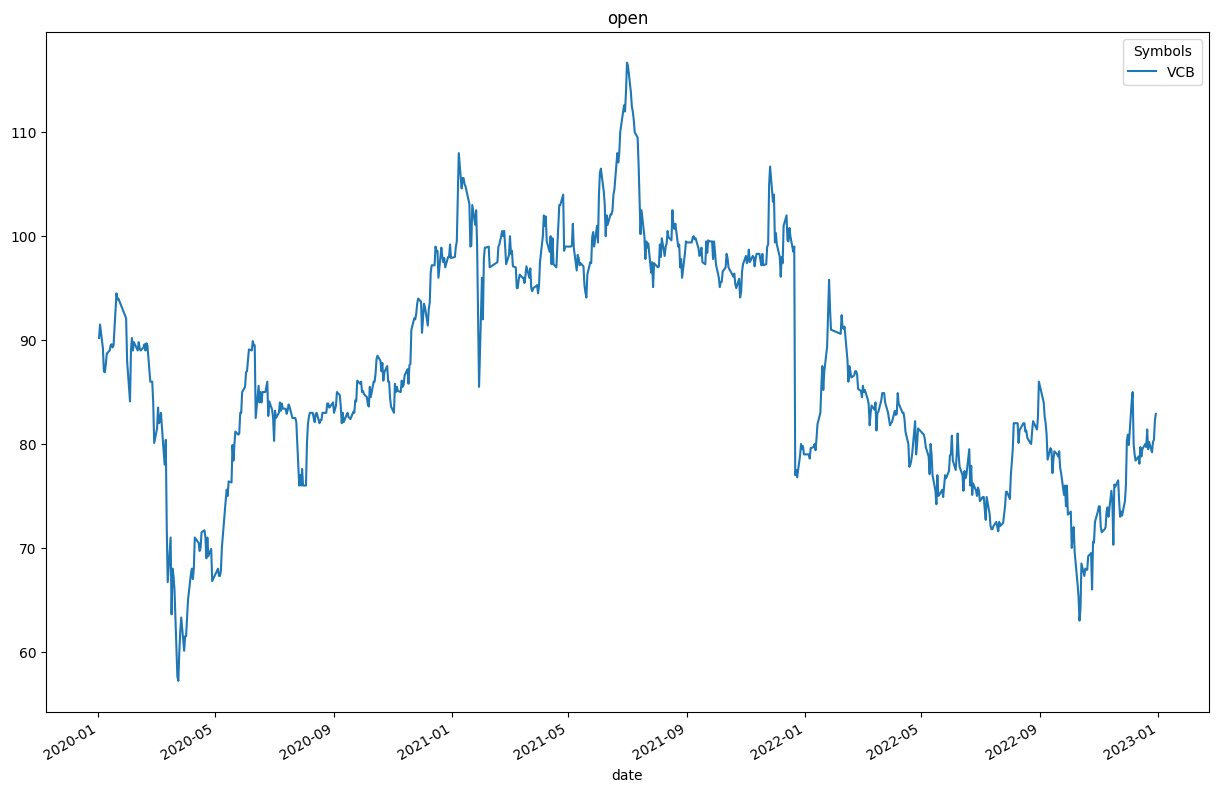

In [218]:
import matplotlib.pyplot as plot
stock_VCB.data['open'].plot(label='VCB', figsize=(15,10), title ='open')

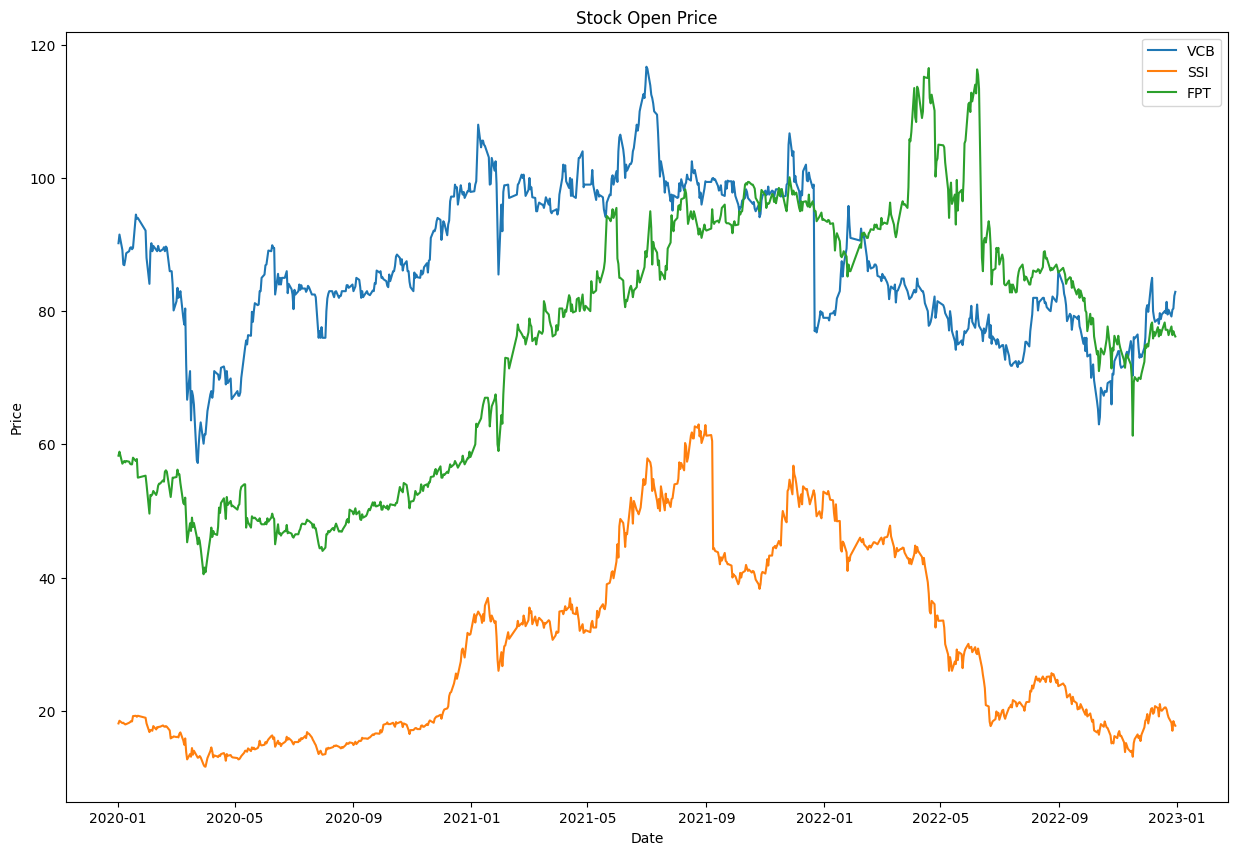

In [219]:
import matplotlib.pyplot as plot
fig,ax = plot.subplots(figsize=(15,10))
ax.plot(stock_VCB.data['open'], label="VCB")
ax.plot(stock_SSI.data['open'], label='SSI')
ax.plot(stock_FPT.data['open'], label='FPT')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Stock Open Price')
plot.legend()


In [225]:
import matplotlib.pyplot as plt

class MultiStockChart:
    def __init__(self, stocks):
        self.stocks = stocks

    def plot_prices(self, price_type):
        fig, ax = plt.subplots(figsize=(15, 10))

        for stock in self.stocks:
            stock_name = [name for name, obj in globals().items() if obj is stock][0]
            try:
                ax.plot(stock.data[price_type], label= stock_name )
            except AttributeError:
                ax.plot(stock[price_type], label= stock_name )
            # except Exception as e:
            #     # Xử lý các lỗi khác (nếu cần)
            #     result = f"Lỗi không xác định: {e}"
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.set_title(f'Stock {price_type.capitalize()} Price')
        plt.legend()
        


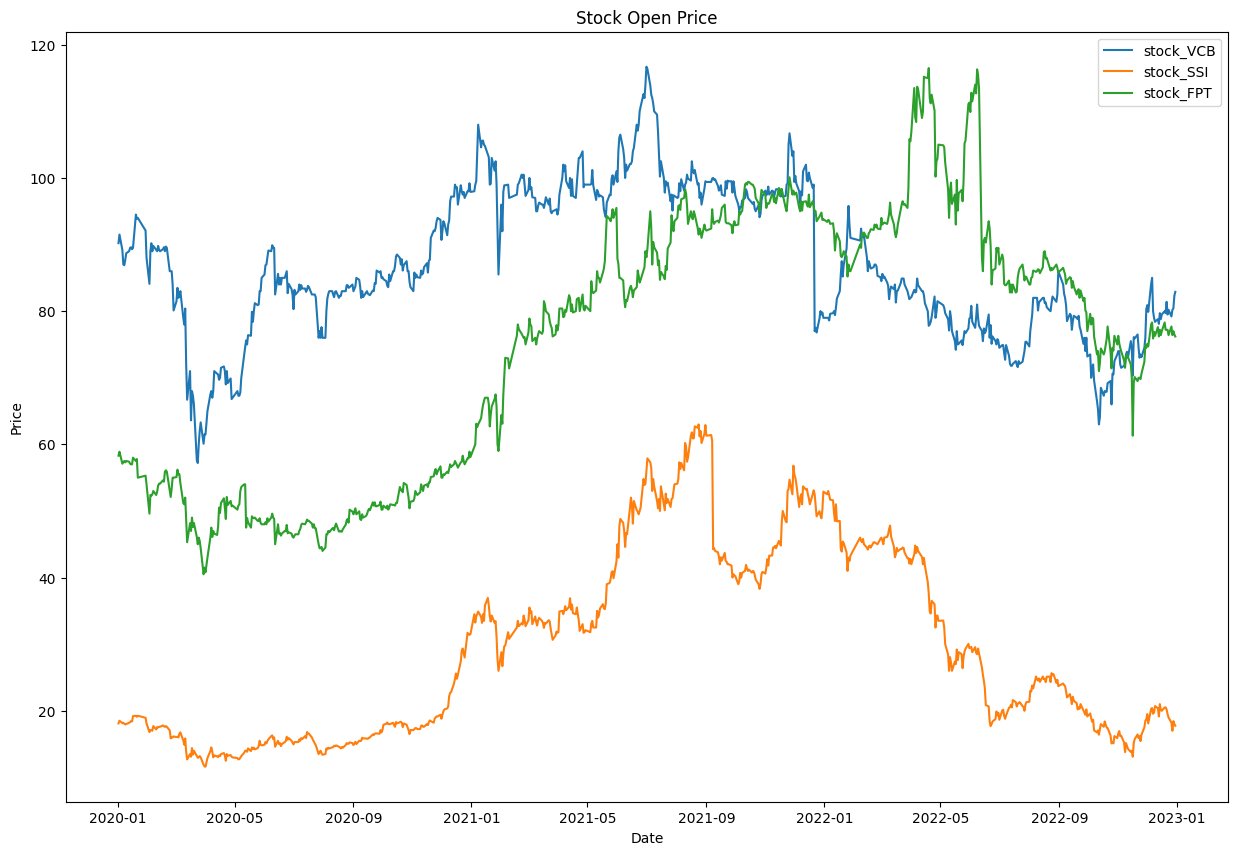

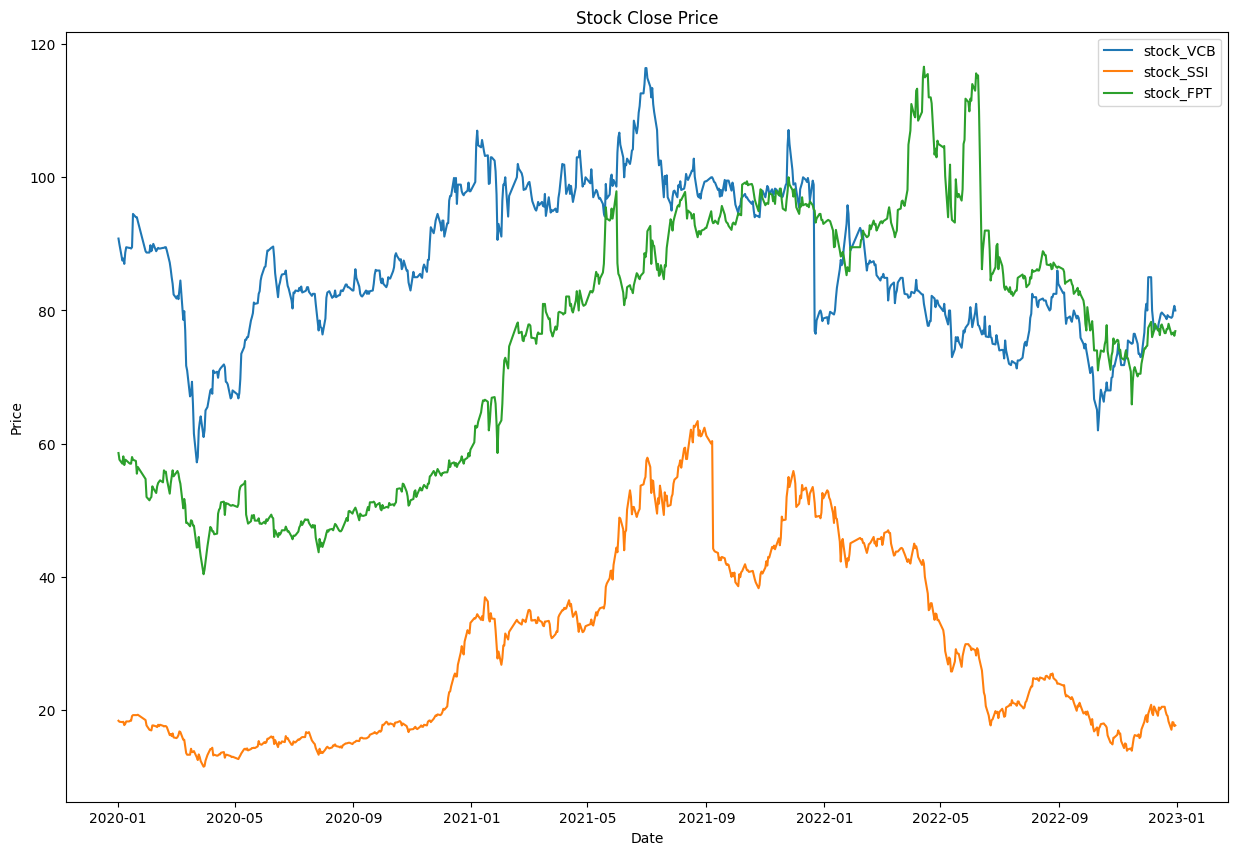

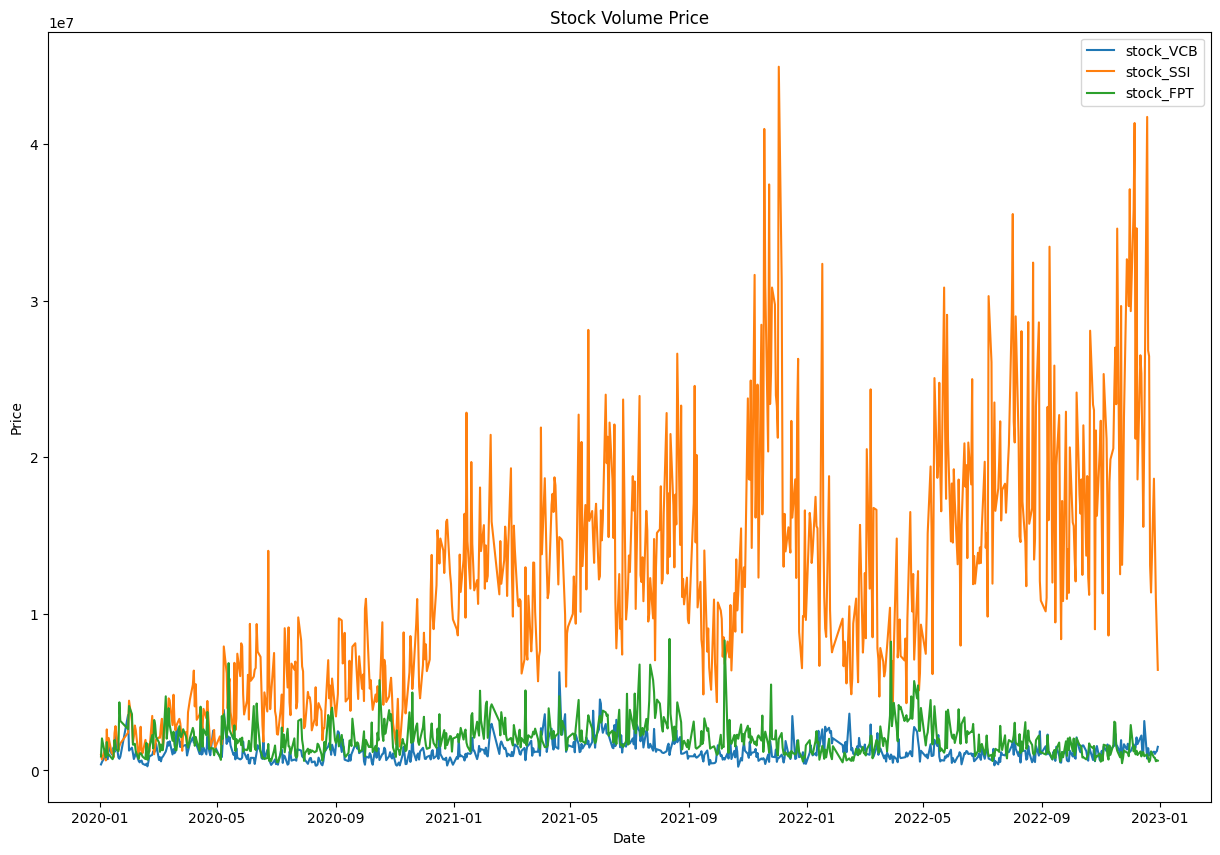

In [221]:
stocks = [stock_VCB, stock_SSI, stock_FPT]
multi_chart = MultiStockChart(stocks)
multi_chart.plot_prices('open')
multi_chart.plot_prices('close')
multi_chart.plot_prices('volume')

In [243]:
import pandas as pd
import numpy as np
stock_VCB_copy = stock_VCB.data.copy()
class StockAnalysis:
    def __init__(self, data):
        self.data = data

    def calculate_daily_returns(self):
        self.data['Daily_Returns'] = self.data['close'].pct_change()

    def calculate_cumulative_returns(self):
        self.data['Cumulative_Returns'] = (1 + self.data['Daily_Returns']).cumprod() - 1

    def calculate_moving_average(self, window):
        self.data['MA'] = self.data['close'].rolling(window=window).mean()

    def calculate_rsi(self, window):
        delta = self.data['close'].diff()
        gain = delta.where(delta > 0, 0)
        loss = -delta.where(delta < 0, 0)

        avg_gain = gain.rolling(window=window).mean()
        avg_loss = loss.rolling(window=window).mean()

        rs = avg_gain / avg_loss
        self.data['RSI'] = 100 - (100 / (1 + rs))

    def calculate_bollinger_bands(self, window, num_std_dev=2):
        rolling_mean = self.data['close'].rolling(window=window).mean()
        rolling_std = self.data['close'].rolling(window=window).std()

        upper_band = rolling_mean + num_std_dev * rolling_std
        lower_band = rolling_mean - num_std_dev * rolling_std

        self.data['Upper_Band'] = upper_band
        self.data['Lower_Band'] = lower_band

    def calculate_macd(self, short_window, long_window):
        exp_short = self.data['close'].ewm(span=short_window, adjust=False).mean()
        exp_long = self.data['close'].ewm(span=long_window, adjust=False).mean()

        self.data['MACD'] = exp_short - exp_long

# Example usage
data = stock_VCB_copy # Thay thế bằng dữ liệu thực tế
analysis = StockAnalysis(data)
analysis.calculate_moving_average(window=50)
analysis.calculate_rsi(window=14)
analysis.calculate_bollinger_bands(window=20)
analysis.calculate_macd(short_window=12, long_window=26)
analysis.calculate_daily_returns()
analysis.calculate_cumulative_returns()

# Xem dữ liệu đã tính toán
print(analysis.data)


Attributes  high   low  open close    avg     volume      MA        RSI  \
Symbols      VCB   VCB   VCB   VCB    VCB        VCB                      
date                                                                      
2020-01-02  91.4  89.7  90.2  90.8  90.68   386290.0     NaN        NaN   
2020-01-03  91.8  89.9  91.5  89.9  90.81   536130.0     NaN        NaN   
2020-01-06  89.5  87.5  89.2  87.5  88.54   880110.0     NaN        NaN   
2020-01-07  87.9  85.4  87.0  87.8  86.54  1013270.0     NaN        NaN   
2020-01-08  87.9  86.2  86.9  87.0  86.97   722280.0     NaN        NaN   
...          ...   ...   ...   ...    ...        ...     ...        ...   
2022-12-26  80.8  78.9  79.2  78.9  79.96  1203600.0  75.440  42.857143   
2022-12-27  80.5  78.9  80.2  79.1  79.75  1058000.0  75.668  54.687500   
2022-12-28  82.0  79.5  80.4  80.0  80.79  1173500.0  75.910  75.862069   
2022-12-29  82.5  80.5  82.3  80.7  81.42  1237400.0  76.140  77.419355   
2022-12-30  83.1  80.0  8

Attributes  high   low  open close    avg     volume daily_returns
Symbols      VCB   VCB   VCB   VCB    VCB        VCB              
date                                                              
2020-01-02  91.4  89.7  90.2  90.8  90.68   386290.0           NaN
2020-01-03  91.8  89.9  91.5  89.9  90.81   536130.0     -0.009912
2020-01-06  89.5  87.5  89.2  87.5  88.54   880110.0     -0.026696
2020-01-07  87.9  85.4  87.0  87.8  86.54  1013270.0      0.003429
2020-01-08  87.9  86.2  86.9  87.0  86.97   722280.0     -0.009112


<Axes: title={'center': 'VCB'}, ylabel='Density'>

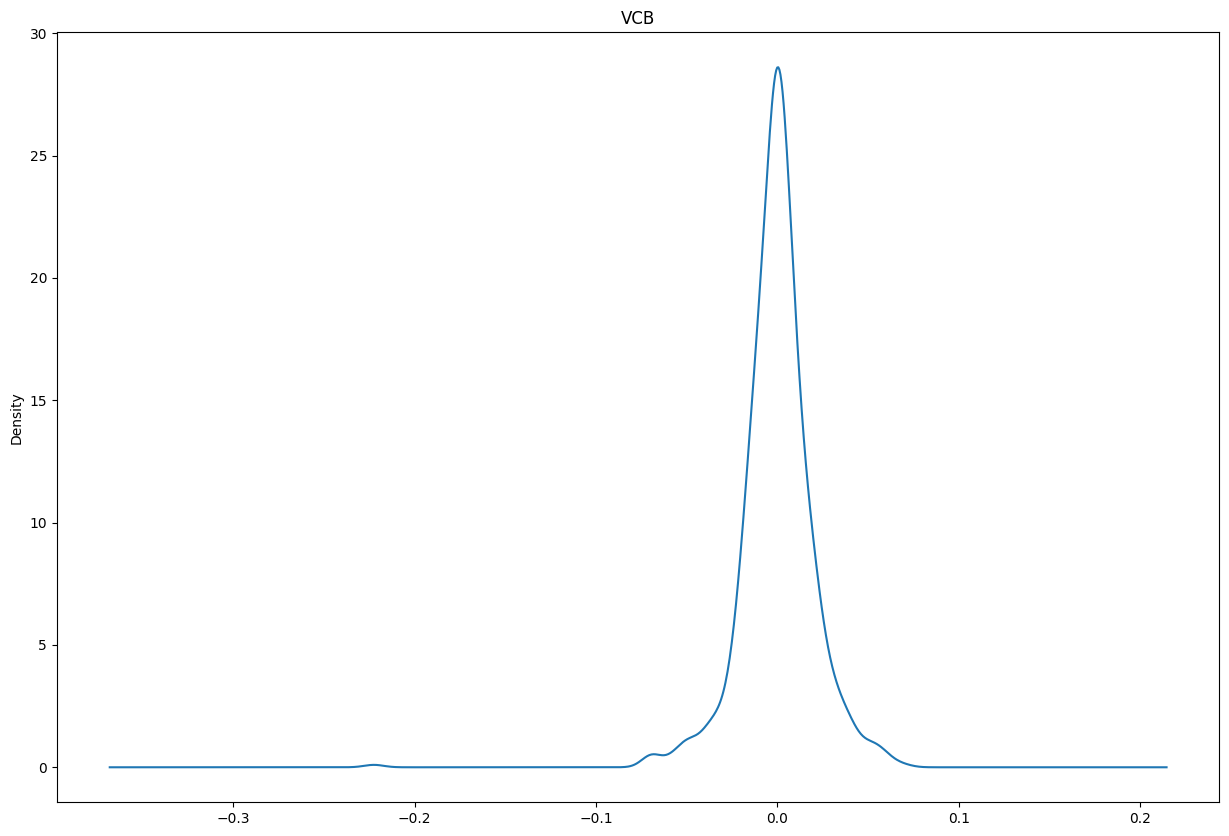

In [236]:
stock_VCB_copy = stock_VCB.data.copy()
stock_VCB_copy['daily_returns'] = stock_VCB.data['close'].pct_change(1)
print(stock_VCB_copy.head())
stock_VCB_copy['cumulative_returns'] = (1 + stock_VCB_copy['daily_returns']).cumprod() - 1
stock_VCB_copy['daily_returns'].plot(kind='kde', label='daily_returns', figsize=(15,10), title='VCB')

<Axes: title={'center': 'returns'}, ylabel='Density'>

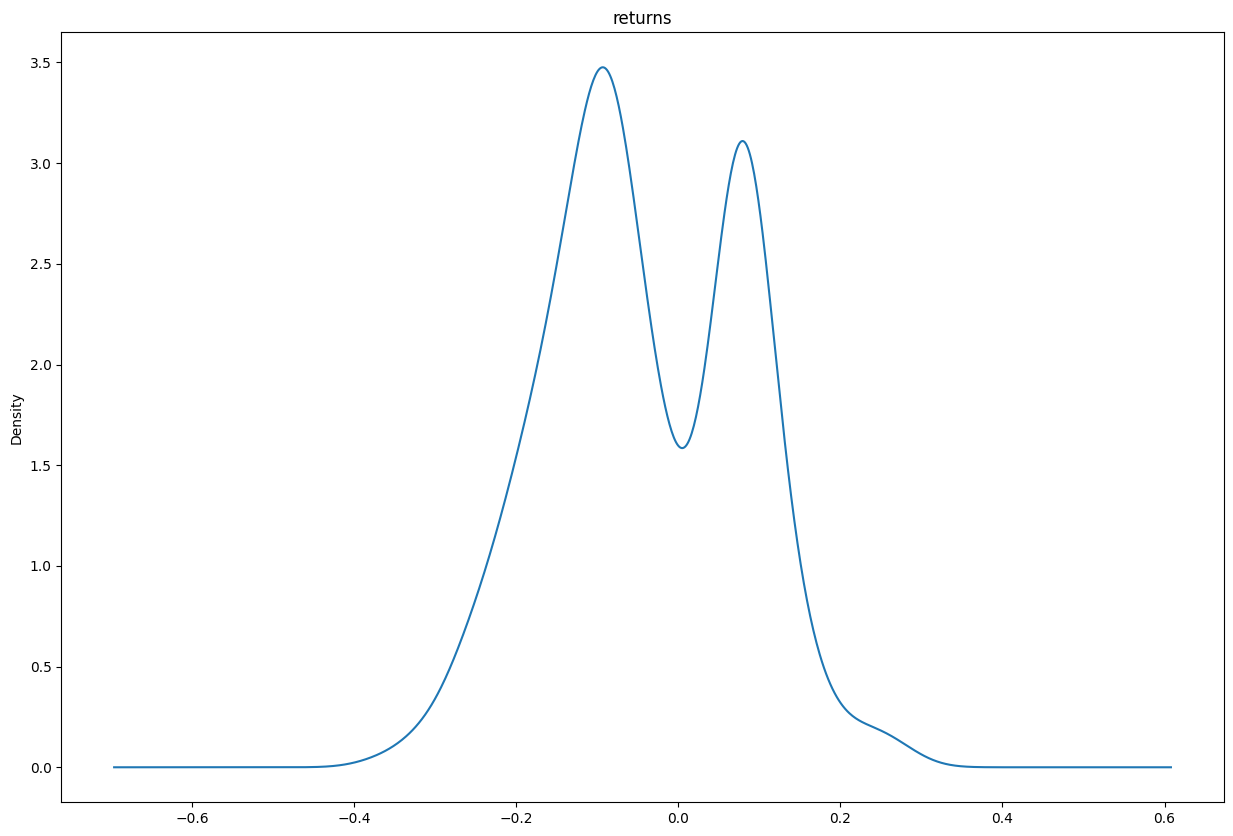

In [237]:
stock_VCB_copy['cumulative_returns'].plot(kind='kde', label='cumulative_returns', figsize=(15,10), title='returns')

Attributes  high   low  open close    avg     volume daily_returns
Symbols      VCB   VCB   VCB   VCB    VCB        VCB              
date                                                              
2020-01-02  91.4  89.7  90.2  90.8  90.68   386290.0           NaN
2020-01-03  91.8  89.9  91.5  89.9  90.81   536130.0     -0.009912
2020-01-06  89.5  87.5  89.2  87.5  88.54   880110.0     -0.026696
2020-01-07  87.9  85.4  87.0  87.8  86.54  1013270.0      0.003429
2020-01-08  87.9  86.2  86.9  87.0  86.97   722280.0     -0.009112


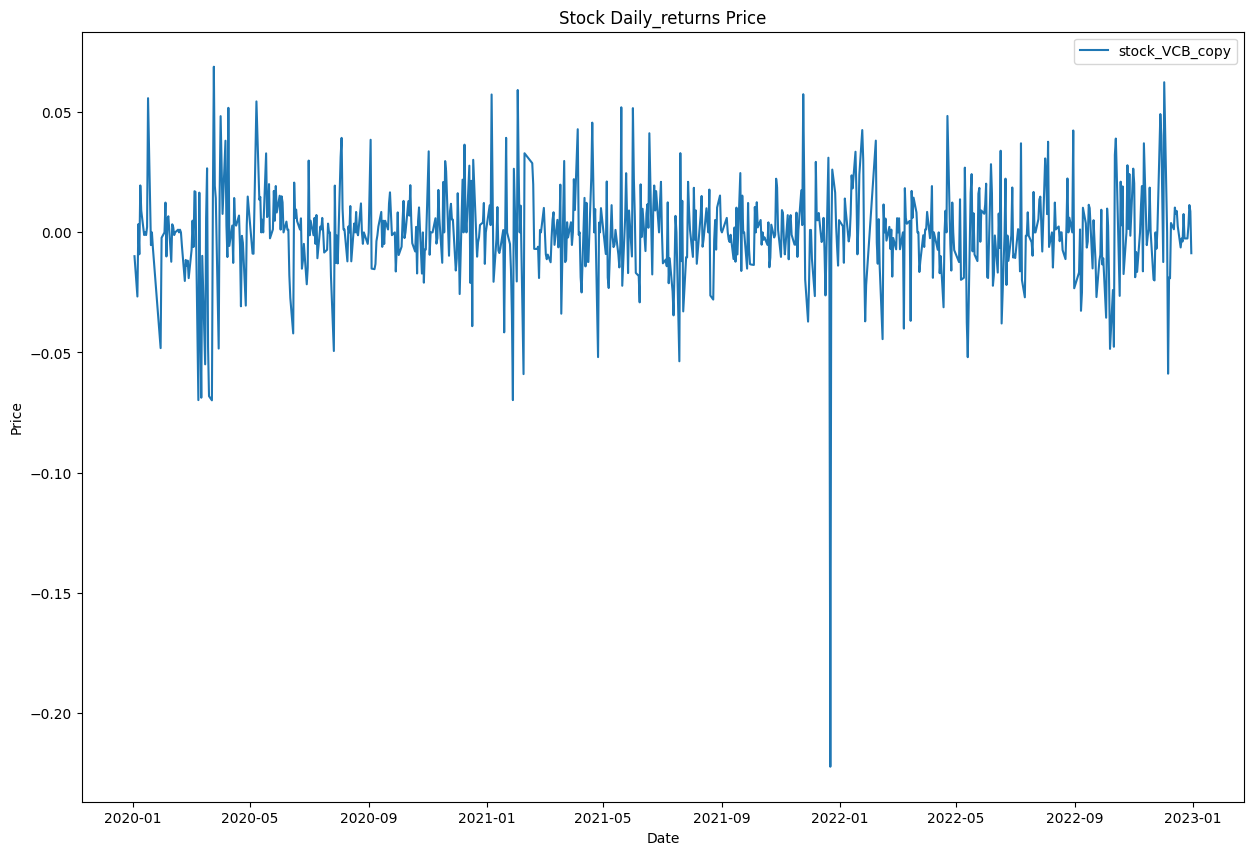

In [233]:
stock_VCB_copy = stock_VCB.data.copy()
stock_VCB_copy['daily_returns'] = stock_VCB.data['close'].pct_change(1)
print(stock_VCB_copy.head())
multi_chart = MultiStockChart([stock_VCB_copy])
multi_chart.plot_prices('daily_returns')

In [234]:
data_hvn.info()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'